In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('/Users/Marcy_Student/Desktop/Food Insecurity Analysis/datasets/cleaned_for_eda/cleaned_neighborhood_prioritization_eda.csv')

In [22]:
df.head()

,nta_id,nta_name,borough,food_insecure_percentage,food_insecure_percentage_rank,unemployment_rate,unemployment_rate_rank,vulnerable_population_percentage,vulnerable_population_percentage_rank,supply_gap,weighted_score,latitude_generated,latitude_generated.1
0,BK0104,East Williamsburg,Brooklyn,35.99,1,6.38,126,12.43,146,2.776626e+06,8.2210,40.714789,40.714789
1,BX0501,University Heights (South)-Morris Heights,Bronx,29.44,14,11.98,20,19.63,34,1.669389e+06,8.0704,40.850930,40.850930
2,BX0901,Soundview-Bruckner-Bronx River,Bronx,22.63,36,10.06,32,21.43,25,1.625976e+06,7.6866,40.830599,40.830599
3,MN1202,Washington Heights (North),Manhattan,24.29,28,12.25,19,18.57,41,1.463457e+06,7.3895,40.857729,40.857729
4,BK1503,Sheepshead Bay-Manhattan Beach-Gerritsen Beach,Brooklyn,21.11,42,4.91,170,15.95,81,1.907056e+06,7.2775,40.587225,40.587225


In [23]:
# print the info of the dataframe to understand the data types and check for missing values
print(df.info())
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   nta_id                                 197 non-null    object 
 1   nta_name                               197 non-null    object 
 2   borough                                197 non-null    object 
 3   food_insecure_percentage               197 non-null    float64
 4   food_insecure_percentage_rank          197 non-null    int64  
 5   unemployment_rate                      197 non-null    float64
 6   unemployment_rate_rank                 197 non-null    int64  
 7   vulnerable_population_percentage       197 non-null    float64
 8   vulnerable_population_percentage_rank  197 non-null    int64  
 9   supply_gap                             197 non-null    float64
 10  weighted_score                         197 non-null    float64
 11  latitu

nta_id                                   0
nta_name                                 0
borough                                  0
food_insecure_percentage                 0
food_insecure_percentage_rank            0
unemployment_rate                        0
unemployment_rate_rank                   0
vulnerable_population_percentage         0
vulnerable_population_percentage_rank    0
supply_gap                               0
weighted_score                           0
latitude_generated                       0
latitude_generated.1                     0
dtype: int64
0


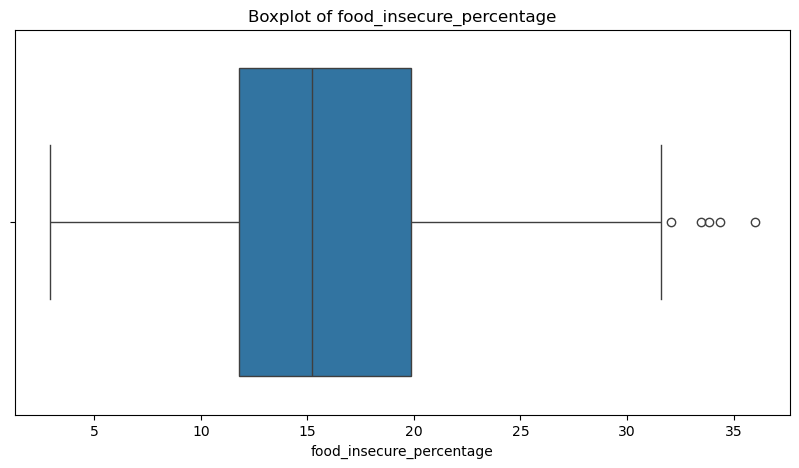

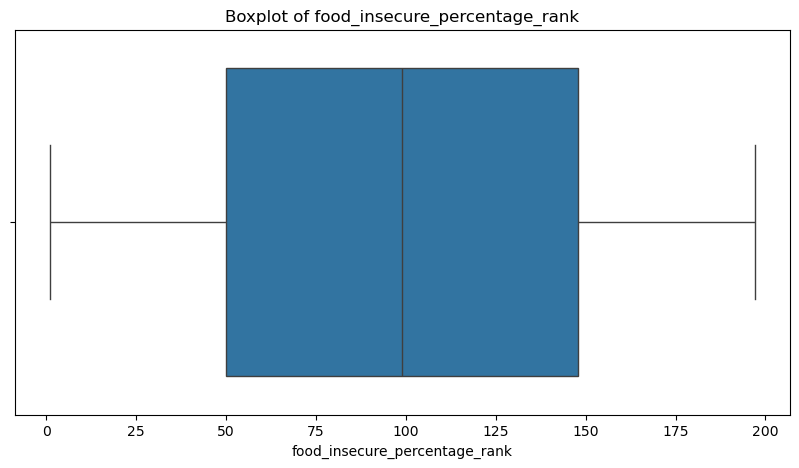

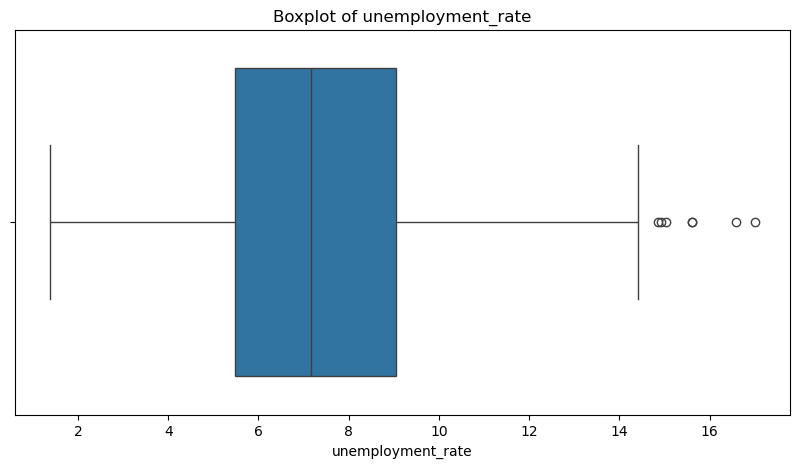

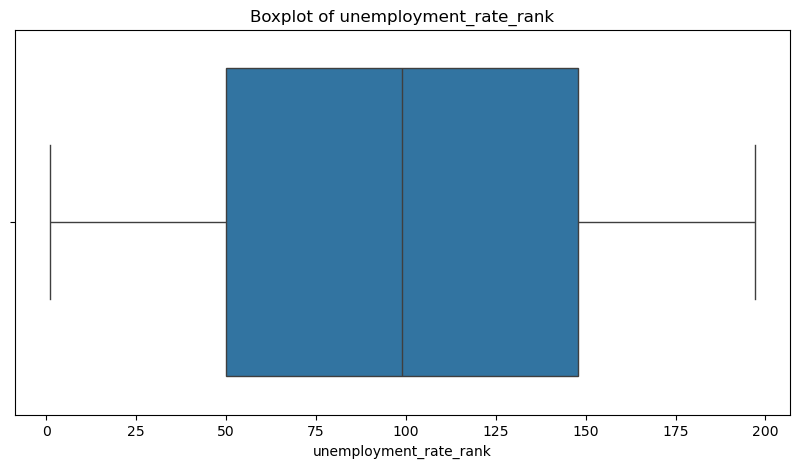

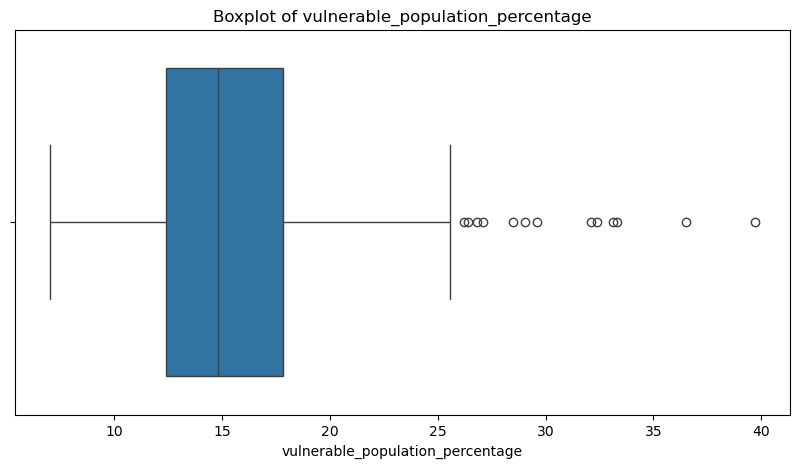

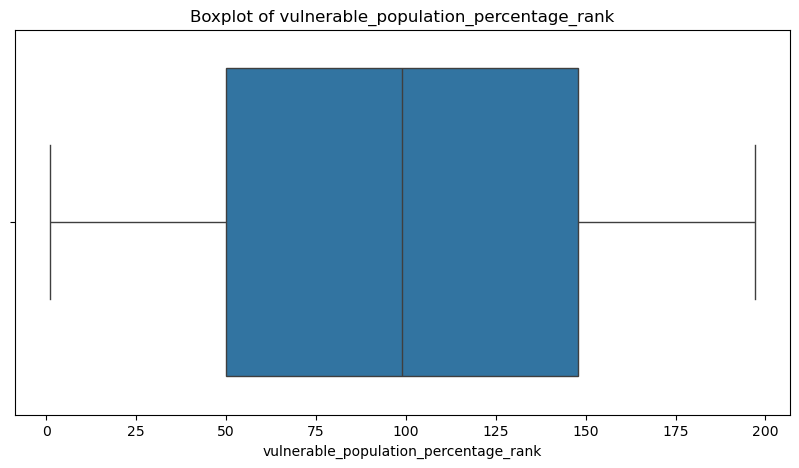

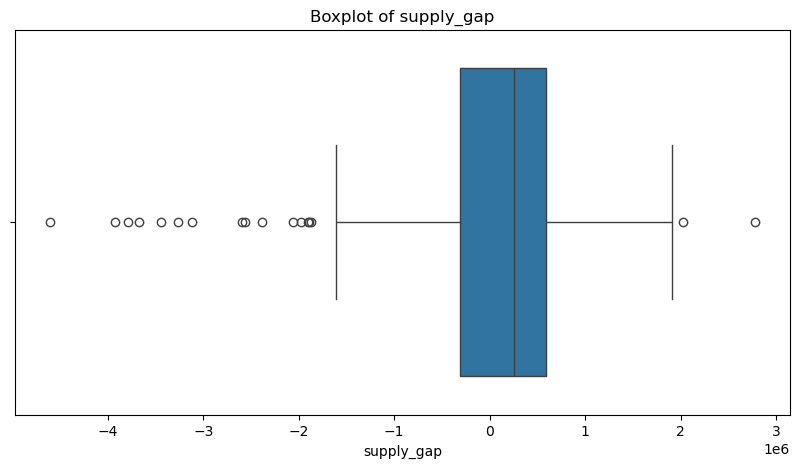

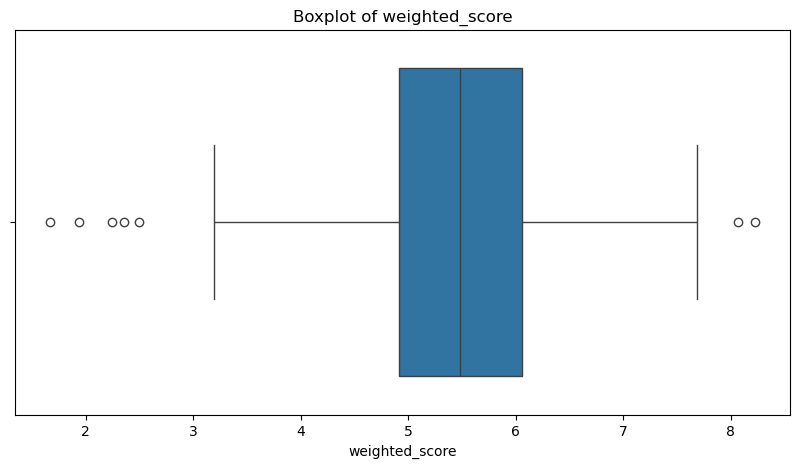

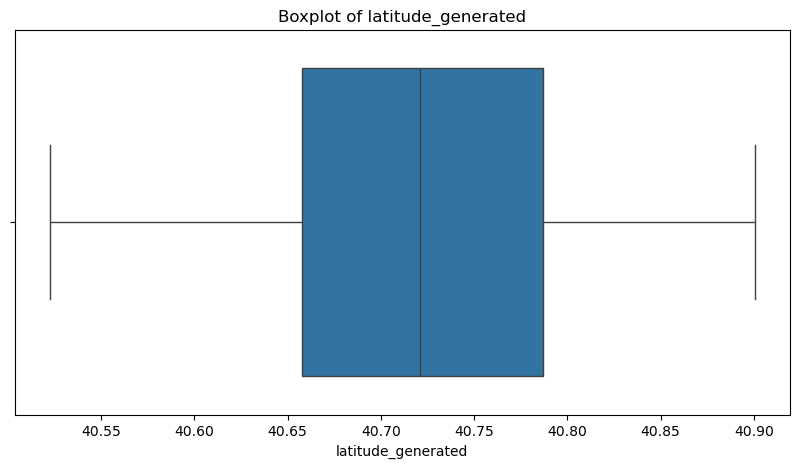

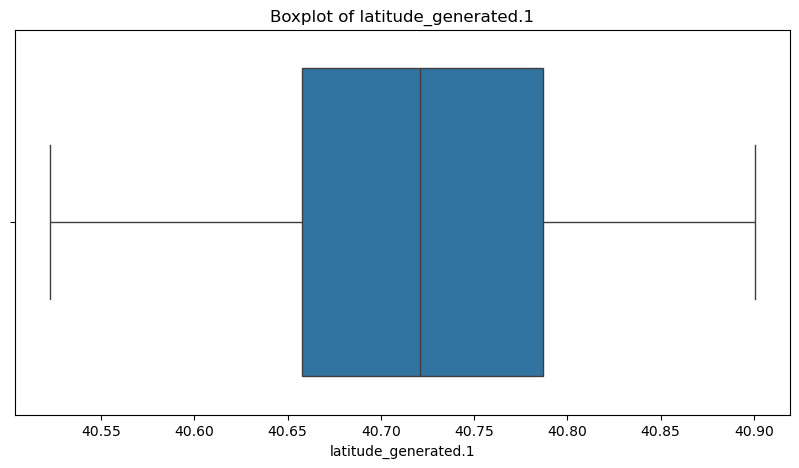

In [24]:
# Check for missing values
print(df.isnull().sum())
# Check for duplicates
print(df.duplicated().sum())
# Check for outliers using boxplots
numeric_columns = df.select_dtypes(include=[np.number]).columns
for column in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [25]:
# write the summary statistics of the numeric columns
df[numeric_columns].describe()

,food_insecure_percentage,food_insecure_percentage_rank,unemployment_rate,unemployment_rate_rank,vulnerable_population_percentage,vulnerable_population_percentage_rank,supply_gap,weighted_score,latitude_generated,latitude_generated.1
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,1.970000e+02,197.000000,197.000000,197.000000
mean,16.519289,99.000000,7.682386,99.000000,15.842386,99.000000,-1.976900e+04,5.414561,40.723644,40.723644
std,6.620541,57.013156,2.977905,57.013156,5.602104,57.013156,1.100397e+06,1.021824,0.087461,0.087461
min,2.920000,1.000000,1.380000,1.000000,7.040000,1.000000,-4.606012e+06,1.667900,40.522663,40.522663
25%,11.790000,50.000000,5.470000,50.000000,12.390000,50.000000,-3.097622e+05,4.911100,40.657713,40.657713
50%,15.210000,99.000000,7.170000,99.000000,14.810000,99.000000,2.561395e+05,5.478200,40.720792,40.720792
75%,19.880000,148.000000,9.060000,148.000000,17.840000,148.000000,5.894113e+05,6.058400,40.786979,40.786979
max,35.990000,197.000000,17.000000,197.000000,39.690000,197.000000,2.776626e+06,8.221000,40.900432,40.900432


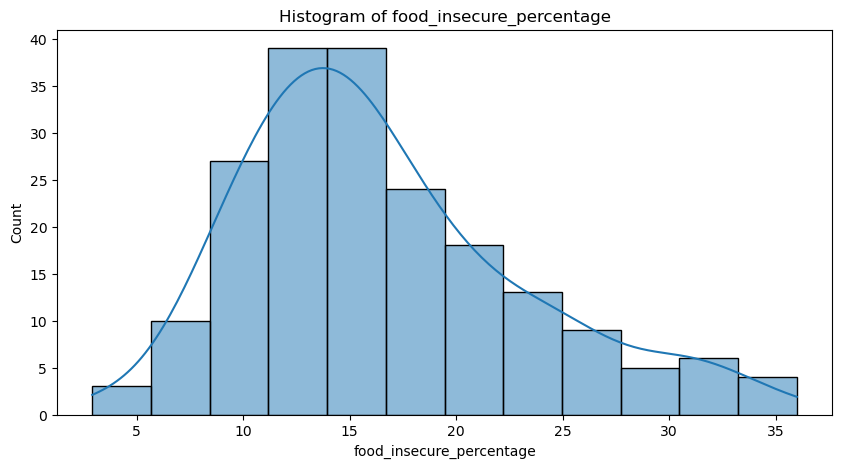

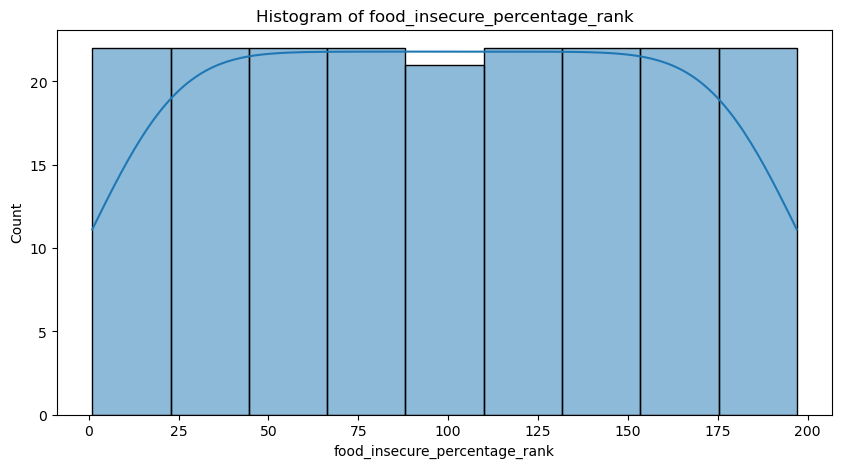

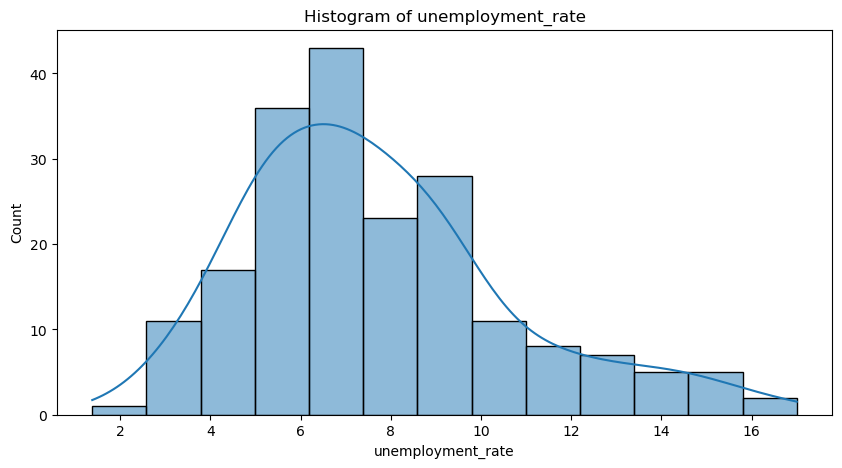

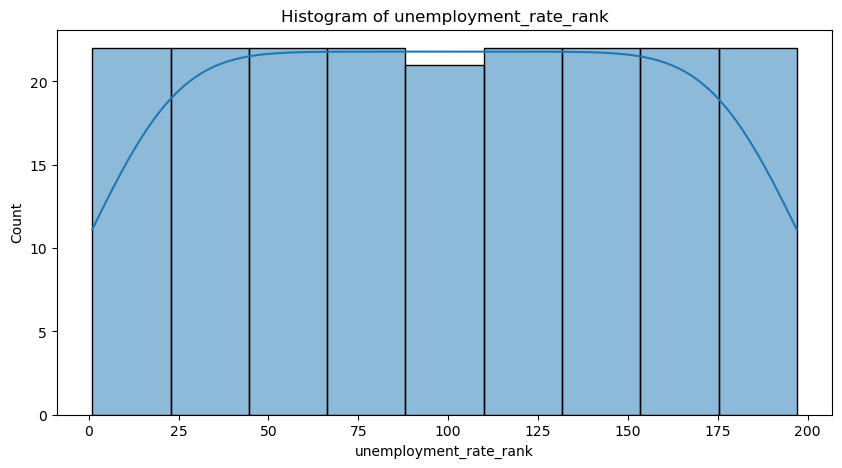

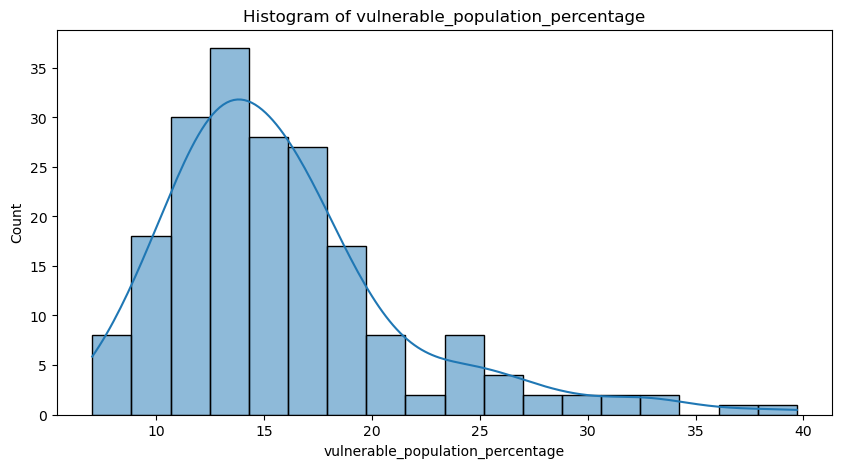

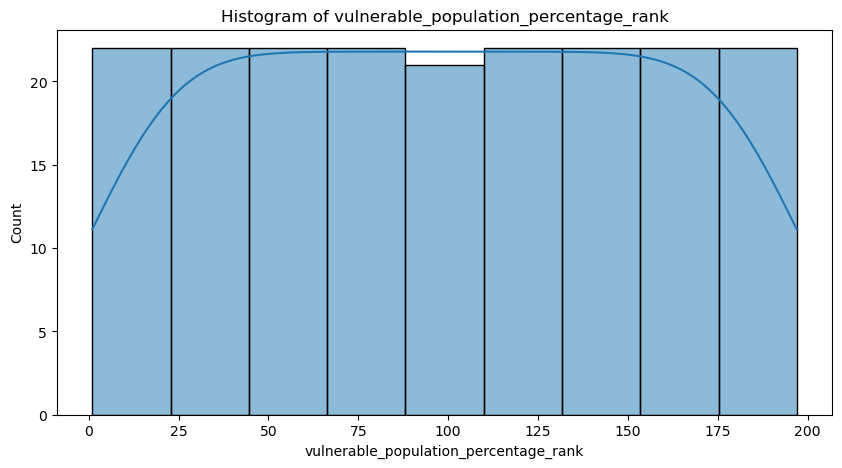

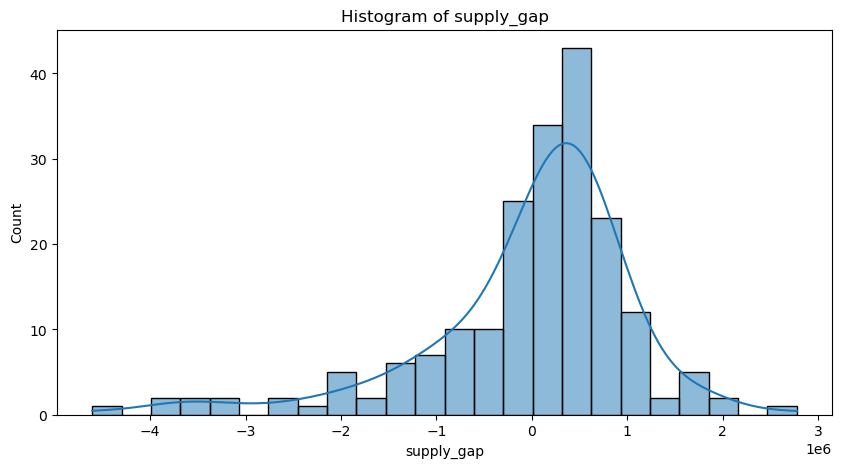

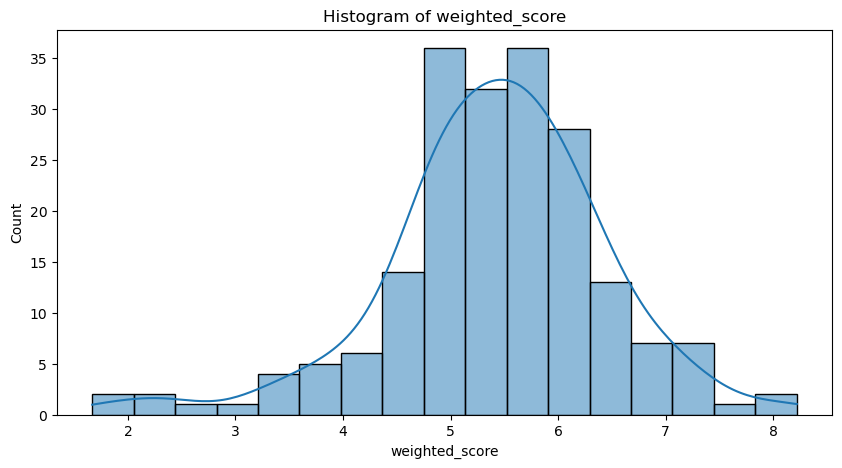

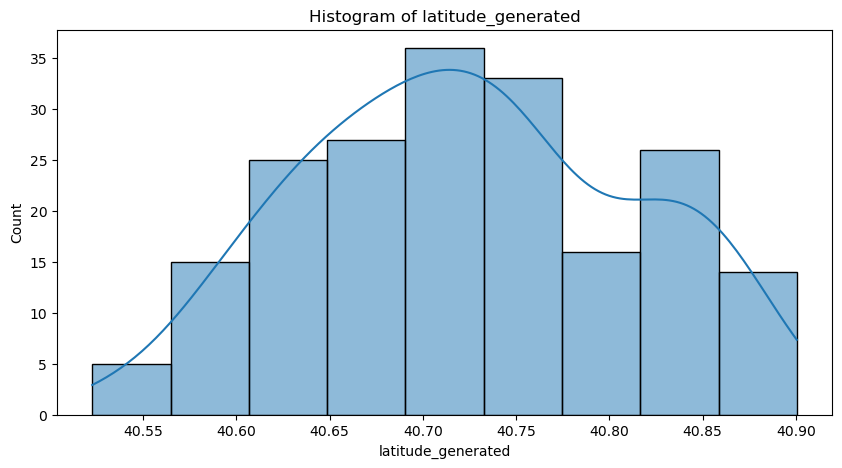

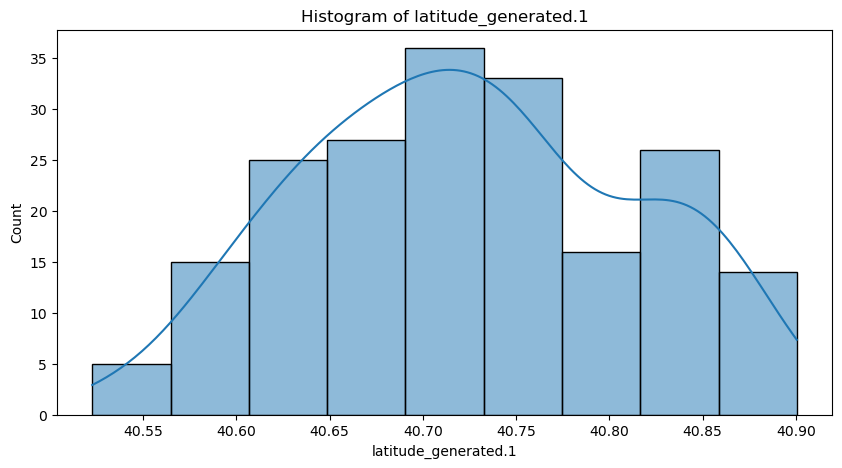

In [26]:
# Let's check the distribution of the data using histograms
for column in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()

In [28]:
df.head()

,nta_id,nta_name,borough,food_insecure_percentage,food_insecure_percentage_rank,unemployment_rate,unemployment_rate_rank,vulnerable_population_percentage,vulnerable_population_percentage_rank,supply_gap,weighted_score,latitude_generated,latitude_generated.1
0,BK0104,East Williamsburg,Brooklyn,35.99,1,6.38,126,12.43,146,2.776626e+06,8.2210,40.714789,40.714789
1,BX0501,University Heights (South)-Morris Heights,Bronx,29.44,14,11.98,20,19.63,34,1.669389e+06,8.0704,40.850930,40.850930
2,BX0901,Soundview-Bruckner-Bronx River,Bronx,22.63,36,10.06,32,21.43,25,1.625976e+06,7.6866,40.830599,40.830599
3,MN1202,Washington Heights (North),Manhattan,24.29,28,12.25,19,18.57,41,1.463457e+06,7.3895,40.857729,40.857729
4,BK1503,Sheepshead Bay-Manhattan Beach-Gerritsen Beach,Brooklyn,21.11,42,4.91,170,15.95,81,1.907056e+06,7.2775,40.587225,40.587225


In [29]:
# Neighborhood Food Insecurity Analysis

neighborhood_stats = df.groupby('borough').agg({
    'nta_id': 'count',
    'food_insecure_percentage': ['mean', 'min', 'max', 'std'],
    'unemployment_rate': ['mean', 'min', 'max'],
    'vulnerable_population_percentage': ['mean', 'min', 'max'],
    'supply_gap': ['mean', 'min', 'max']
}).round(2)

In [30]:
neighborhood_stats

nta_id food_insecure_percentage                      \
               count                     mean    min    max   std   
borough                                                             
Bronx             37                    23.32  10.97  34.35  6.50   
Brooklyn          53                    15.87   7.51  35.99  5.21   
Manhattan         32                    16.30   8.11  33.46  5.75   
Queens            59                    14.37   2.92  31.09  5.74   
Staten Island     16                    11.32   6.00  23.78  4.34   

              unemployment_rate              vulnerable_population_percentage  \
                           mean   min    max                             mean   
borough                                                                         
Bronx                     11.24  5.62  17.00                            16.82   
Brooklyn                   7.28  3.36  14.85                            15.06   
Manhattan                  6.66  2.60  13.60                            13.82   
Queens                     6.92  3.18  15.62                            18.33   
Staten Island              5.64  1.38   8.91                            11.06   

                           supply_gap                          
                min    max       mean         min         max  
borough                                                        
Bronx          9.17  26.83  146958.75 -2560586.09  2022029.14  
Brooklyn       7.70  33.29 -215125.63 -4606011.51  2776626.10  
Manhattan      9.65  19.32  323628.17 -1608497.99  1463457.02  
Queens         7.59  39.69 -172473.03 -3923144.64  1730635.82  
Staten Island  7.04  16.05  118093.64 -1977610.23  1075153.92